In [43]:
import warnings
warnings.filterwarnings('ignore')

import os
import time

# 지도 데이터 분석 라이브러리
import fiona
import geopandas

# 데이터 분석 라|이브러리
import pandas as pd
import numpy as np

# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import style
import seaborn as sns
import folium
from folium.plugins import HeatMap

# 데이터 분리
from sklearn.model_selection import train_test_split

# 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler

# 데이터 샘플링
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# 머신러닝
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
import catboost
import lightgbm
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 모델 스코어링
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

In [2]:
# matplotlib 한글 지원 폰트 설정
plt.rc("font", family="Malgun Gothic")

## 데이터 불러오기(세종, 대구, 대전)

In [4]:
sejong = geopandas.read_file('./dataset/전처리후/세종/merge_11.geojson', encoding='utf-8')
sejong = sejong[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

print(len(sejong))
sejong.head(3)

47396


,geometry,lat,lng,고저차,인구수,건축물수,차량수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",36.455719,127.251282,24.869,0,1,0.000000,83.64,0.00,83.64,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",36.533877,127.387655,25.167,0,1,0.000000,208.91,7.80,198.71,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",36.585083,127.282326,24.825,27,4,38.518751,99.70,6.43,99.25,0,0,0,0,0,0,0,0,0,0


In [4]:
daegu = geopandas.read_file('./dataset/전처리후/대구/merge_11.geojson', encoding='utf-8')
daegu = daegu[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

print(len(daegu))
daegu.head(3)

134846


,geometry,lat,lng,고저차,인구수,건축물수,차량수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((1098300.00000 1762500.00000, 1098300...",35.861902,128.587298,28.786,124.0,18.0,217.350598,473.52,9.97,452.73,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((1095800.00000 1760400.00000, 1095800...",35.843036,128.559580,28.763,298.0,47.0,341.642043,215.99,8.83,213.95,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((1099700.00000 1760500.00000, 1099700...",35.843935,128.602820,28.865,173.0,6.0,1281.325765,263.28,19.39,1323.18,0,0,0,0,0,0,0,0,0,0


In [5]:
daejeon = geopandas.read_file('./dataset/전처리후/대전/merge_11.geojson', encoding='utf-8')
daejeon = daejeon[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

print(len(daejeon))
daejeon.head(3)

92051


,geometry,lat,lng,고저차,인구수,건축물수,차량수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((992800.00000 1826000.00000, 992800.0...",36.432362,127.417591,25.355,77.0,8.0,225.319501,107.63,10.78,1488.43,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((993300.00000 1822700.00000, 993300.0...",36.402716,127.423134,25.429,286.0,1.0,836.901002,0.00,0.00,9653.28,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((992800.00000 1827500.00000, 992800.0...",36.445837,127.417591,25.335,81.0,18.0,237.024410,147.06,7.18,172.82,0,0,0,0,0,0,0,0,0,0


## Train / Test Data 정의

### data / target 분리

#### Train set

In [6]:
# 학습 데이터는 대구+대전
# 226897개

train_data = pd.concat([daegu[daegu.columns[3:-1]], daejeon[daejeon.columns[3:-1]]])
print(len(train_data))
train_data.head()

226897


,고저차,인구수,건축물수,차량수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설
0,28.786,124.0,18.0,217.350598,473.52,9.97,452.73,0,0,0,0,0,0,0,0,0
1,28.763,298.0,47.0,341.642043,215.99,8.83,213.95,0,0,0,0,0,0,0,0,0
2,28.865,173.0,6.0,1281.325765,263.28,19.39,1323.18,0,0,0,0,0,0,0,0,0
3,28.777,166.0,34.0,1229.480214,201.79,8.20,213.84,0,0,0,0,0,0,0,0,0
4,28.832,438.0,2.0,767.738404,0.00,54.80,8614.43,0,0,0,0,0,0,0,0,0


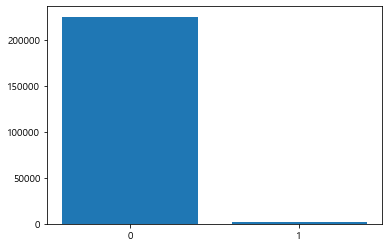

0    224937
1      1960
Name: EV, dtype: int64


In [7]:
# 학습 데이터의 Y는 격자 내 전기차 충전소 유무
# 대구+대전에서 전기차 충전소가 없는 격자는 224937곳, 있는 곳은 1960곳

train_target = pd.concat([daegu[daegu.columns[-1]], daejeon[daejeon.columns[-1]]])

plt.bar(train_target.unique(), train_target.value_counts())
plt.xticks([0, 1])
plt.show()
print(train_target.value_counts())

#### Test set

In [8]:
# 검증 데이터는 세종시
# 47396개

test_data = sejong[sejong.columns[3:-1]]
print(len(test_data))
test_data.head()

47396


,고저차,인구수,건축물수,차량수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설
0,24.869,0,1,0.000000,83.64,0.00,83.64,0,0,0,0,0,0,0,0,0
1,25.167,0,1,0.000000,208.91,7.80,198.71,0,0,0,0,0,0,0,0,0
2,24.825,27,4,38.518751,99.70,6.43,99.25,0,0,0,0,0,0,0,0,0
3,25.007,0,3,0.000000,123.00,5.37,277.76,0,0,0,0,0,0,0,0,0
4,24.447,27,20,28.287931,77.54,8.25,123.95,0,0,0,0,0,0,0,0,0


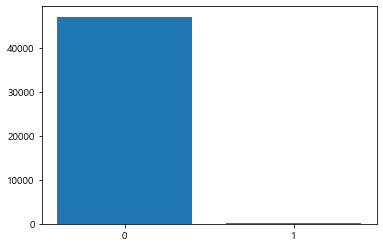

0    47120
1      276
Name: EV, dtype: int64


In [9]:
# 검증 데이터의 Y는 격자 내 전기차 충전소 유무
# 세종시에서 전기차 충전소가 없는 격자는 47120곳, 있는 곳은 276곳

test_target = sejong[sejong.columns[-1]]

plt.bar(test_target.unique(), test_target.value_counts())
plt.xticks([0, 1])
plt.show()
print(test_target.value_counts())

## 모델 정의

In [10]:
### GridSearchCV는 쉽게 최적의 파라미터를 찾아주지만, 안그래도 편향된 데이터를 CV를 활용하다보니 성능이 도리어 안나오는 상황이 연출됨
### 따라서 반복문을 통해 GridSearch와 유사하게 모든 경우의수를 비교할 수 있도록하고, CV는 활용하지 않는 방향으로 진행

### RandomForestClassifier

In [52]:
def RandomForest(dists, train_data, train_target, test_data, test_target):
    
    trainF1 = []
    testF1 = []
    sketch_trainF1 = []
    sketch_testF1 = []
    param = []

    for estimators in dists['max_depth']:
        testf1indepth = []
        trainf1indepth = []
        for depth in dists['n_estimators']:
            for features in dists['max_features']:
                clf = ensemble.RandomForestClassifier(n_estimators=estimators, max_depth=depth, max_features=features, n_jobs=4)
                clf.fit(train_data, train_target)
                Y_predTrain = clf.predict(train_data)
                Y_predTest = clf.predict(test_data)
                
                param.append([estimators, depth, features])
                trainF1.append(f1_score(train_target, Y_predTrain, average='micro'))
                testF1.append(f1_score(test_target, Y_predTest, average='micro'))
                testf1indepth.append(f1_score(test_target, Y_predTest, average='micro'))
                trainf1indepth.append(f1_score(train_target, Y_predTrain, average='micro'))
        
        sketch_trainF1.append(max(trainf1indepth))
        sketch_testF1.append(max(testf1indepth))
                    
    best_params = param[testF1.index(max(testF1))]
    print()
    print('best_params (test 성능이 가장 좋은 파라미터) : ', 'n_estimators=', best_params[0], 'max_depth=', best_params[1], 'max_features=', best_params[2])
    print('best_score (test F1 score):', max(testF1))
    print()

    # F1 score 비교
    plt.figure(figsize=(15, 6))
    plt.plot(dists['max_depth'], sketch_trainF1, 'ro-', dists['max_depth'], sketch_testF1, 'bv--')
    plt.legend(['Train F1', 'Test F1'])
    plt.xlabel('estimators')
    plt.ylabel('F1 score')
    plt.show()
    
    # 최적의 파라미터를 입력해 모델을 생성
    clf = ensemble.RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1], max_features=best_params[2], n_jobs=4)
    clf.fit(train_data, train_target)
    Y_predTest = clf.predict(test_data)
    
    temp = sejong.copy()
    temp['pred'] = [0]*len(temp)
    for i, idx in enumerate(test_data.index):
        temp['pred'][idx] = Y_predTest[i]
    #temp['pred'] = pred
        
    print('실제 충전소 수 :', len(temp[temp['EV']==1]))
    print('충전소가 있어야 한다고 분류한 타일 수 :', len(temp[temp['pred']==1]))
    print('recall score 실제 충전소가 맞는 지 맞춘 경우 :', len(temp[(temp['pred']==1) & (temp['EV']==1)]), '/', len(temp[temp['EV']==1]))
    print('precision score 실제 충전소가 없는 곳을 맞춘 경우 :', len(temp[(temp['pred']==0) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    print('최적 입지 후보(실제론 없지만, 있어야 한다고 분류) :', len(temp[(temp['pred']==1) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    
    # feature inportance
    feature_importance = clf.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    fig = plt.figure(figsize=(12, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(test_data.columns)[sorted_idx])
    plt.title('Feature Importance')
    
    idx = temp[(temp['EV'] == 0) & (temp['pred'] == 1)].index
    for i in temp[temp['pred'] == 1].index:
        temp['pred'].loc[i] = 0
    for i in idx:
        temp['pred'].loc[i] = 1

    fig, ax1 = plt.subplots(figsize=(15, 15))
    fig.set_facecolor('white')
    sejong['geometry'].plot(ax=ax1, color='gainsboro')
    sejong[sejong['EV']==1].plot(ax=ax1, column='EV', color='lime', aspect=1)
    temp[temp['pred']==1].plot(ax=ax1, column='pred', color='red', aspect=1)
    ax1.set_axis_off()
    plt.show()
    
    return clf, temp

### 학습 & 시각화


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 15 max_depth= 30 max_features= 16
best_score (test F1 score): 0.994155624947253



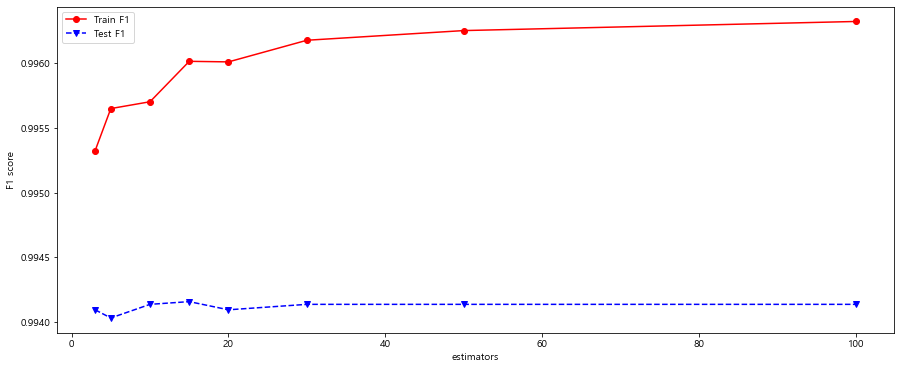

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 13
recall score 실제 충전소가 맞는 지 맞춘 경우 : 0 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47107 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 13 / 47120


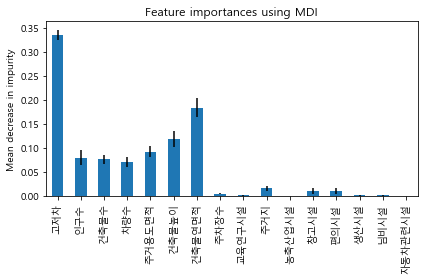

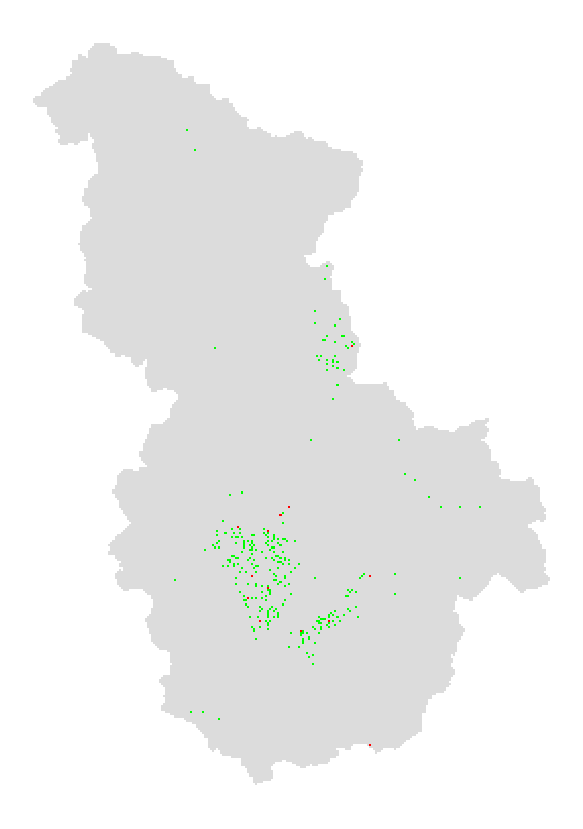

In [12]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

#### TP가 0으로 기존 충전소를 제대로 분류하지 못함.

### 정규화

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sejong_minmax = scaler.fit_transform(sejong[['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
sejong_minmax = pd.DataFrame(sejong_minmax, columns=['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
sejong[['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = sejong_minmax

sejong.head(3)

,geometry,lat,lng,고저차,인구수,건축물수,차량수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",36.455719,127.251282,0.551724,0.00000,0.014706,0.000000,0.090746,0.000000,0.000854,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",36.533877,127.387655,0.894253,0.00000,0.014706,0.000000,0.226660,0.064580,0.002029,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",36.585083,127.282326,0.501149,0.01176,0.058824,0.005338,0.108171,0.053237,0.001014,0,0,0,0,0,0,0,0,0,0


In [14]:
daegu_minmax = scaler.fit_transform(daegu[['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
daegu_minmax = pd.DataFrame(daegu_minmax, columns=['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
daegu[['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = daegu_minmax

daejeon_minmax = scaler.fit_transform(daejeon[['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
daejeon_minmax = pd.DataFrame(daejeon_minmax, columns=['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
daejeon[['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = daejeon_minmax

In [15]:
train_data = pd.concat([daegu[daegu.columns[3:-1]], daejeon[daejeon.columns[3:-1]]])
train_target = pd.concat([daegu[daegu.columns[-1]], daejeon[daejeon.columns[-1]]])

test_data = sejong[sejong.columns[3:-1]]
test_target = sejong[sejong.columns[-1]]


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 20 max_depth= 10 max_features= 16
best_score (test F1 score): 0.9941767237741581



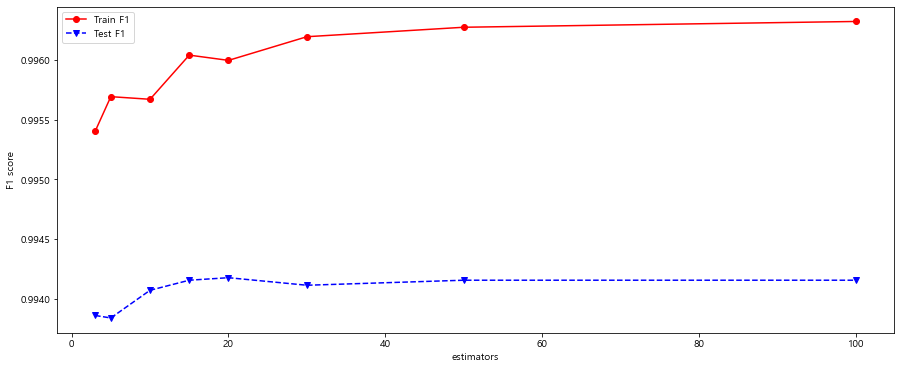

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 3
recall score 실제 충전소가 맞는 지 맞춘 경우 : 1 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47118 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 2 / 47120


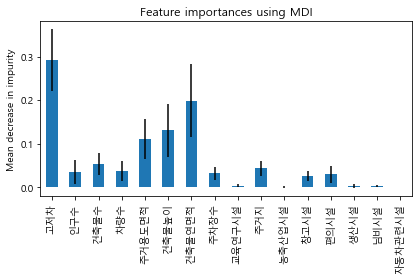

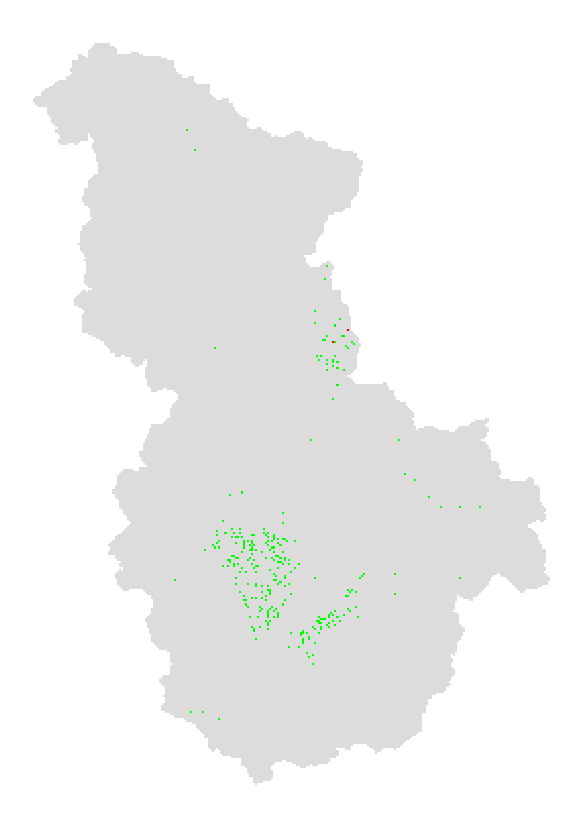

In [16]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

### 정규화 -> 언더샘플링

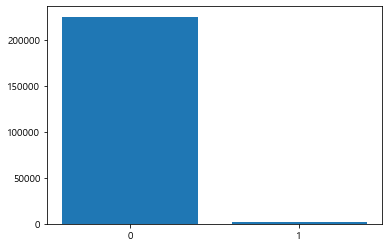

In [17]:
plt.bar([0, 1], train_target.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()

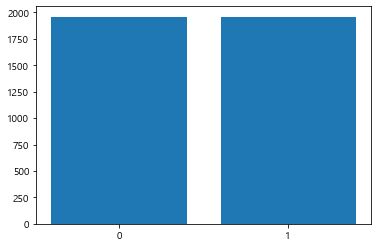

In [18]:
rus = RandomUnderSampler()
train_data, train_target = rus.fit_resample(train_data, train_target)

plt.bar([0, 1], train_target.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 50 max_depth= 10 max_features= 16
best_score (test F1 score): 0.8452612034770867



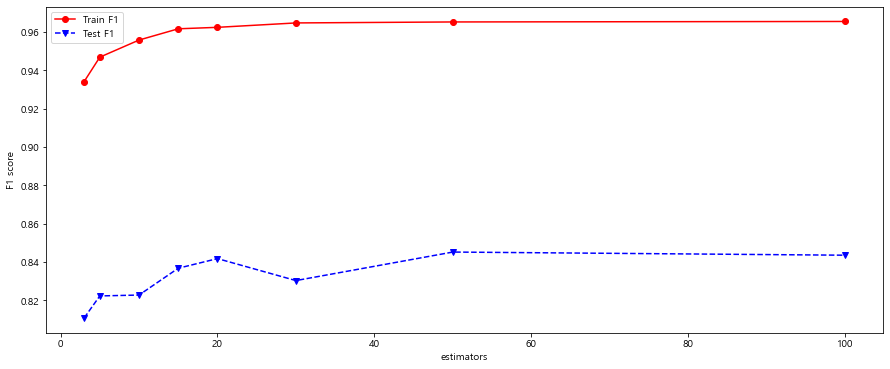

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 7316
recall score 실제 충전소가 맞는 지 맞춘 경우 : 170 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 39974 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 7146 / 47120


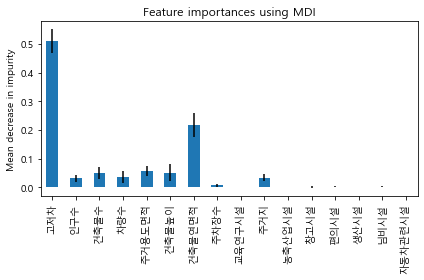

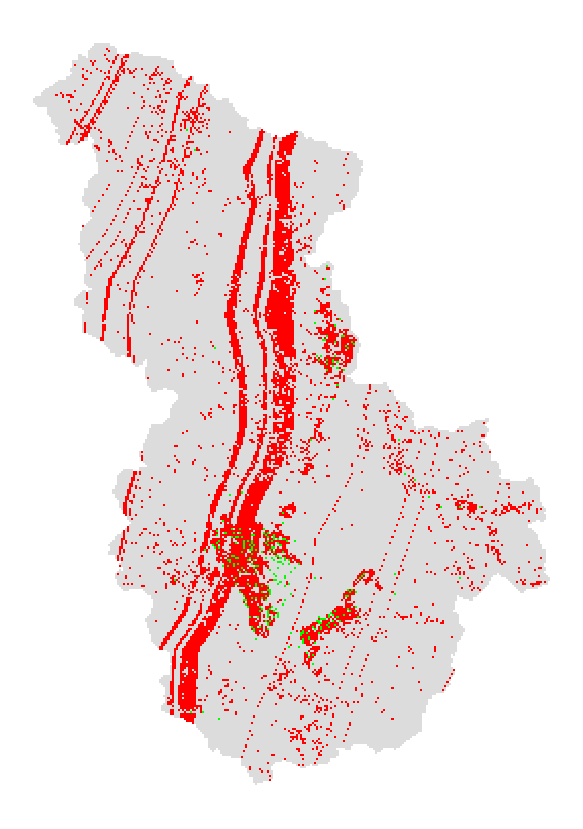

In [19]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

### 정규화 -> 오버샘플링

In [20]:
train_data = pd.concat([daegu[daegu.columns[3:-1]], daejeon[daejeon.columns[3:-1]]])
train_target = pd.concat([daegu[daegu.columns[-1]], daejeon[daejeon.columns[-1]]])

test_data = sejong[sejong.columns[3:-1]]
test_target = sejong[sejong.columns[-1]]

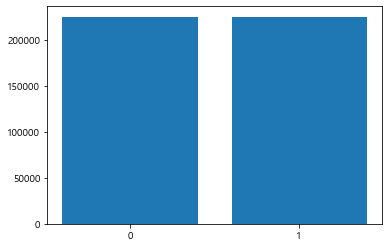

In [21]:
ros = RandomOverSampler()
train_data, train_target = ros.fit_resample(train_data, train_target)

plt.bar([0, 1], train_target.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 10 max_depth= 20 max_features= 16
best_score (test F1 score): 0.9218710439699552



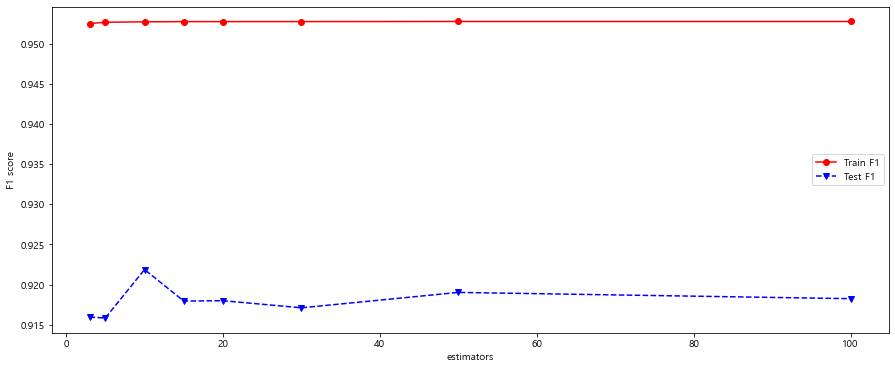

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 3656
recall score 실제 충전소가 맞는 지 맞춘 경우 : 11 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 43475 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 3645 / 47120


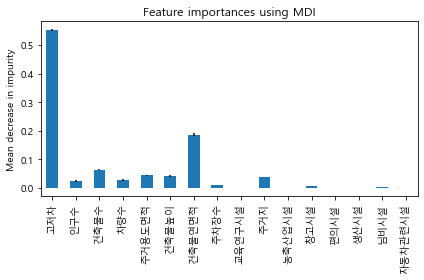

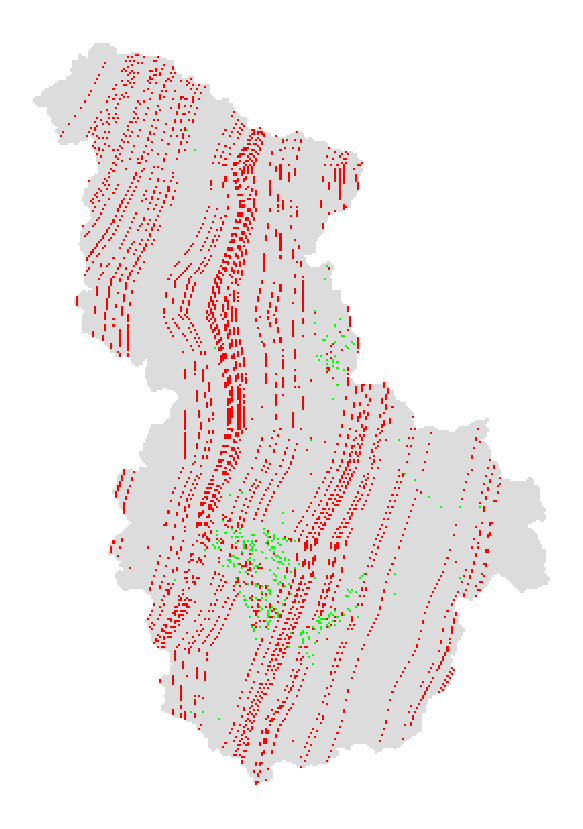

In [22]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

### 학습데이터의 인구수=0 & 충전소=0 인 타일 제거

In [117]:
#### train, test 데이터 모두 데이터가 축소됨
#### train 226897 -> 31387
#### test 47396 -> 3391

In [14]:
# 데이터 불러오기

sejong = geopandas.read_file('./dataset/전처리후/세종/merge_11.geojson', encoding='utf-8')
sejong = sejong[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

daegu = geopandas.read_file('./dataset/전처리후/대구/merge_11.geojson', encoding='utf-8')
daegu = daegu[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

daejeon = geopandas.read_file('./dataset/전처리후/대전/merge_11.geojson', encoding='utf-8')
daejeon = daejeon[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

In [15]:
# 인구수 = 0 & 충전소 = 0 인 타일 제거

sejong_pp = sejong.drop(sejong[(sejong['인구수']==0) & (sejong['EV']==0)].index)
daegu_pp = daegu.drop(daegu[(daegu['인구수']==0) & (daegu['EV']==0)].index)
daejeon_pp = daejeon.drop(daejeon[(daejeon['인구수']==0) & (daejeon['EV']==0)].index)

print('세종시 데이터 수 :', len(sejong))
print('세종시 인구수=0, 충전소=0인 타일:', len(sejong_pp), end='\n\n')

print('대전시 데이터 수 :', len(daejeon))
print('대전시 인구수=0인, 충전소=0인 타일:', len(daejeon_pp), end='\n\n')

print('대구시 데이터 수 :', len(daegu))
print('대구시 인구수=0인, 충전소=0인 타일:', len(daegu_pp))

sejong_pp_idx = sejong_pp.index

sejong_pp.reset_index(drop=True, inplace=True)
daejeon_pp.reset_index(drop=True, inplace=True)
daegu_pp.reset_index(drop=True, inplace=True)

세종시 데이터 수 : 47396
세종시 인구수=0, 충전소=0인 타일: 3391

대전시 데이터 수 : 92051
대전시 인구수=0인, 충전소=0인 타일: 12557

대구시 데이터 수 : 134846
대구시 인구수=0인, 충전소=0인 타일: 18830


In [16]:
# 정규화

scaler = MinMaxScaler()
sejong_pp_minmax = scaler.fit_transform(sejong_pp[['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
sejong_pp_minmax = pd.DataFrame(sejong_pp_minmax, columns=['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
sejong_pp[['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = sejong_pp_minmax

daegu_pp_minmax = scaler.fit_transform(daegu_pp[['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
daegu_pp_minmax = pd.DataFrame(daegu_pp_minmax, columns=['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
daegu_pp[['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = daegu_pp_minmax

daejeon_pp_minmax = scaler.fit_transform(daejeon_pp[['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
daejeon_pp_minmax = pd.DataFrame(daejeon_pp_minmax, columns=['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
daejeon_pp[['인구수', '건축물수', '차량수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = daejeon_pp_minmax

In [17]:
# 학습 / 검증 데이터 셋 분리

train_data = pd.concat([daegu_pp[daegu_pp.columns[3:-1]], daejeon_pp[daejeon_pp.columns[3:-1]]])
train_target = pd.concat([daegu_pp[daegu_pp.columns[-1]], daejeon_pp[daejeon_pp.columns[-1]]])

test_data = sejong_pp[sejong_pp.columns[3:-1]]
test_target = sejong_pp[sejong_pp.columns[-1]]

test_data.set_index(sejong_pp_idx, inplace=True)


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 15 max_depth= 10 max_features= 16
best_score (test F1 score): 0.9563550575051607



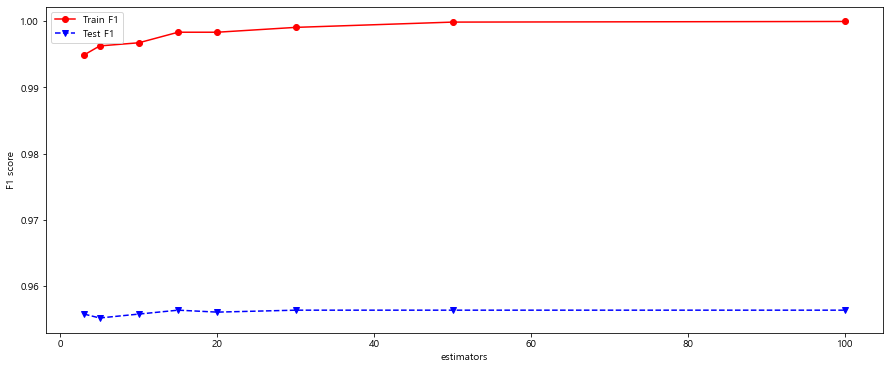

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 132
recall score 실제 충전소가 맞는 지 맞춘 경우 : 129 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47117 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 3 / 47120


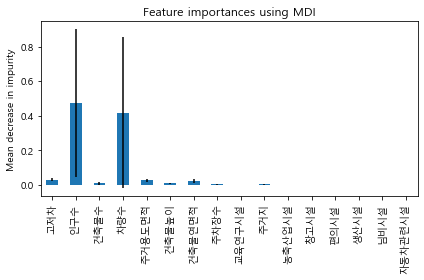

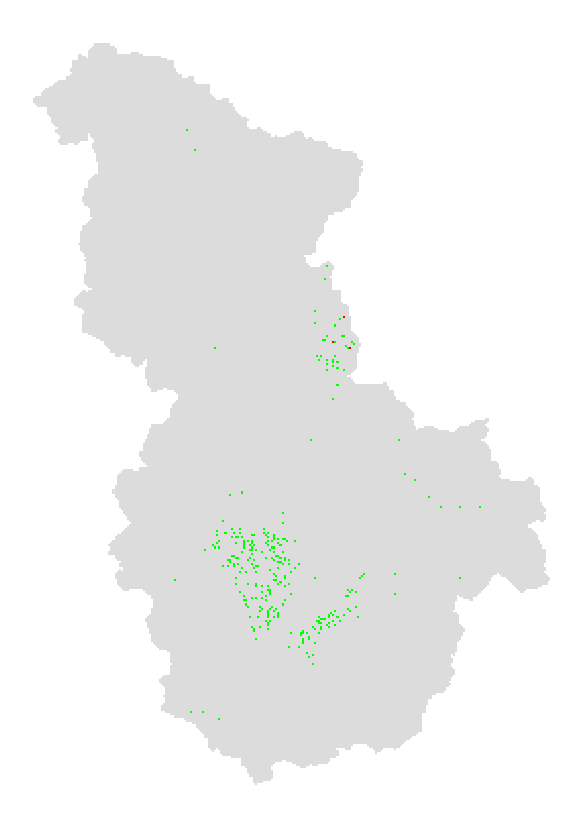

In [57]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

### 언더샘플링

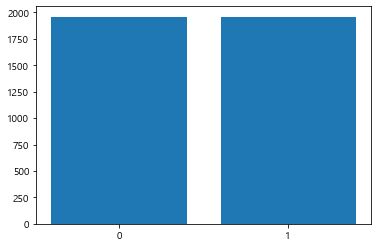

In [18]:
rus = RandomUnderSampler()
train_data_rus, train_target_rus = rus.fit_resample(train_data, train_target)

plt.bar([0, 1], train_target_rus.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 10 max_depth= 50 max_features= 16
best_score (test F1 score): 0.897670303745208



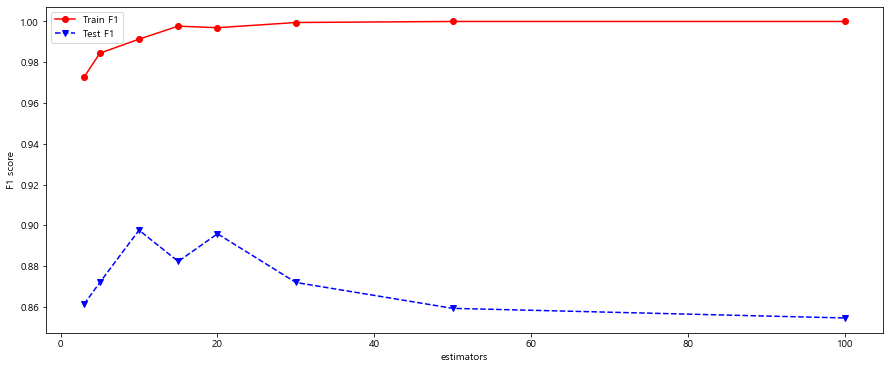

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 522
recall score 실제 충전소가 맞는 지 맞춘 경우 : 165 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 46763 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 357 / 47120


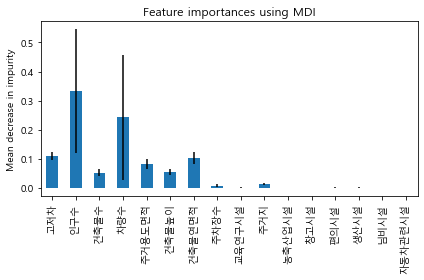

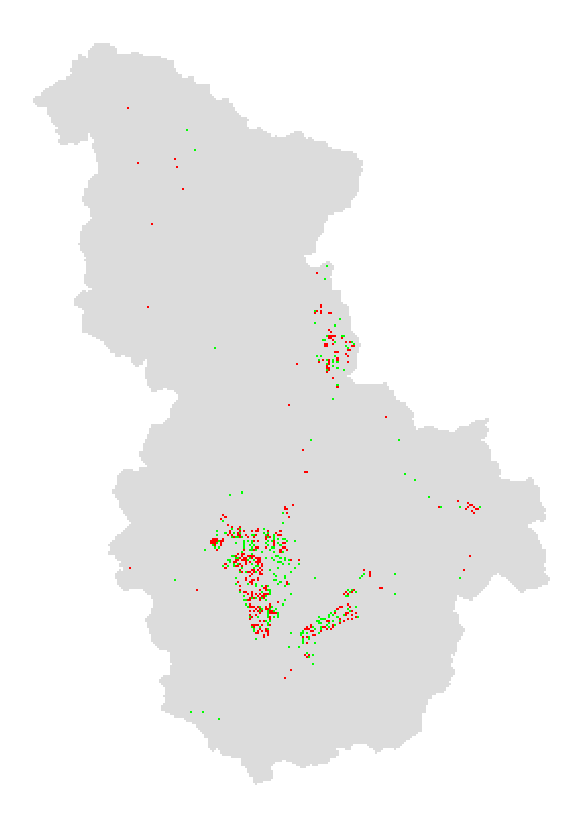

In [59]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

clf, df = RandomForest(dists, train_data_rus, train_target_rus, test_data, test_target)

### 오버샘플링

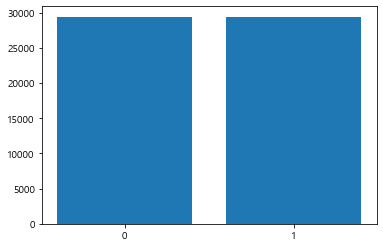

In [19]:
ros = RandomOverSampler()
train_data_ros, train_target_ros = ros.fit_resample(train_data, train_target)

plt.bar([0, 1], train_target_ros.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 30 max_depth= 100 max_features= 16
best_score (test F1 score): 0.9548805662046594



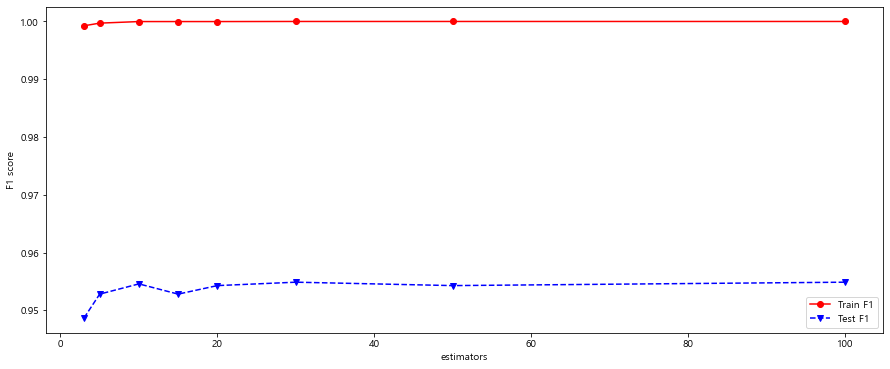

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 135
recall score 실제 충전소가 맞는 지 맞춘 경우 : 128 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47113 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 7 / 47120


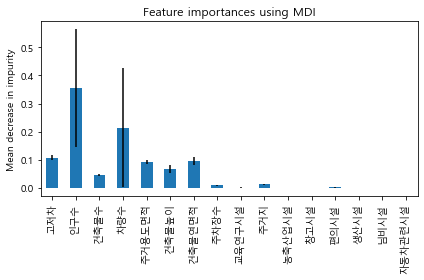

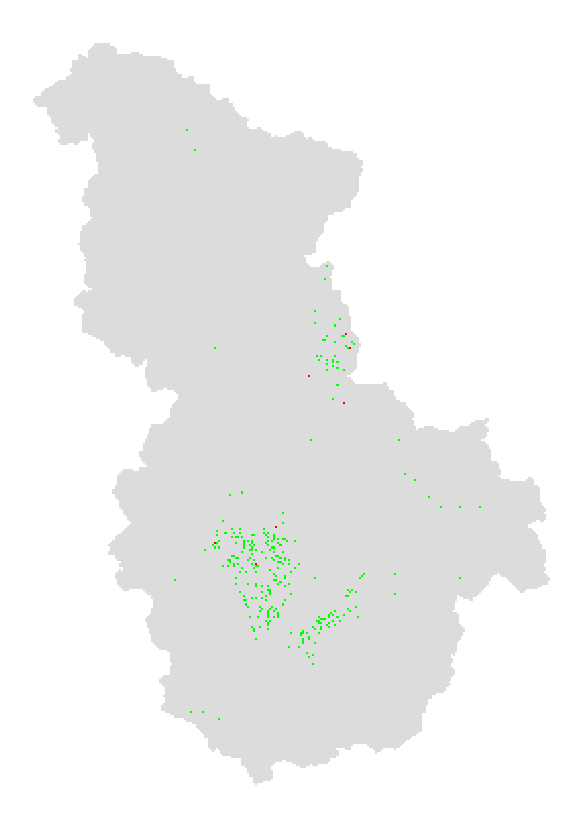

In [61]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100]
}

clf, df = RandomForest(dists, train_data_ros, train_target_ros, test_data, test_target)

### 오버샘플링 (SMOTE)

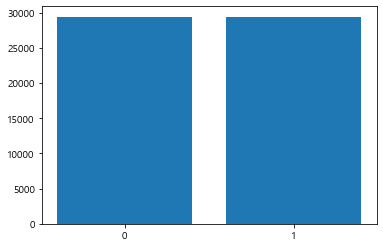

In [61]:
smote = SMOTE()
train_data_smote, train_target_smote = smote.fit_resample(train_data, train_target)

plt.bar([0, 1], train_target_smote.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 20 max_depth= 200 max_features= 16
best_score (test F1 score): 0.9410203479799469



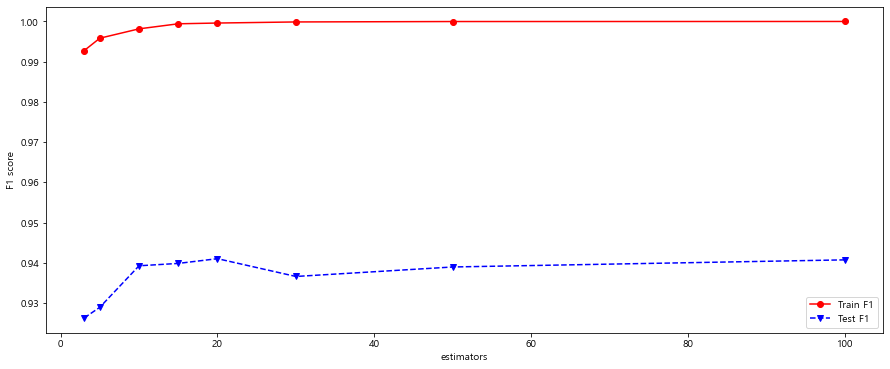

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 213
recall score 실제 충전소가 맞는 지 맞춘 경우 : 136 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47043 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 77 / 47120


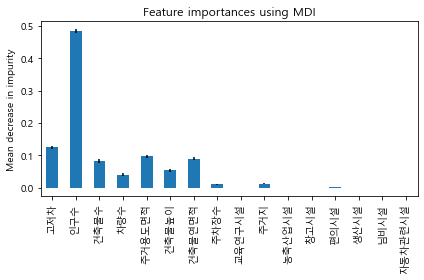

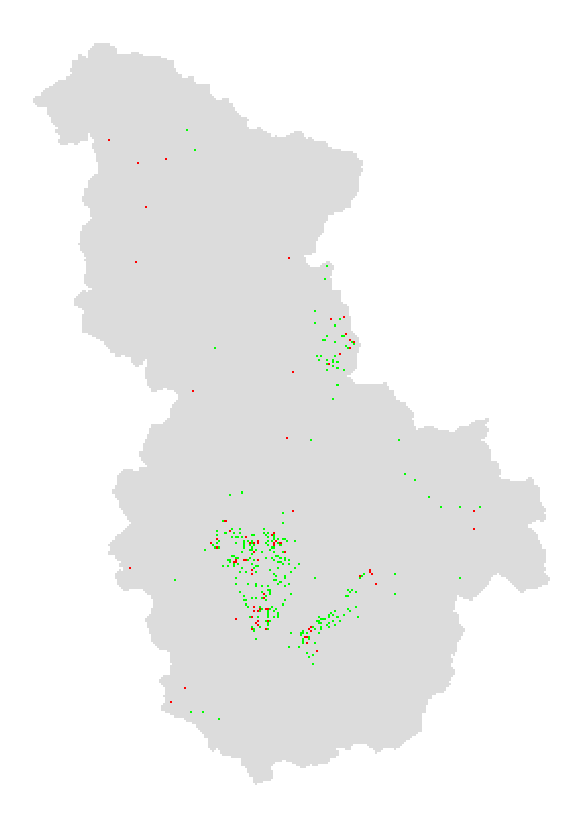

In [63]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

clf, df = RandomForest(dists, train_data_smote, train_target_smote, test_data, test_target)

## 임계치 재설정

### RandomForest & XGBoost & LightGBM & CatBoost

In [62]:
def Classifier(model, dists, train_data, train_target, test_data, test_target, threshold):
    
    trainF1 = []
    testF1 = []
    sketch_trainF1 = []
    sketch_testF1 = []
    param = []
    
    if model == 'XGBoost' or model == 'LightGBM':
        for estimators in dists['max_depth']:
            testf1indepth = []
            trainf1indepth = []
            for depth in dists['n_estimators']:
                for lr in dists['learning_rate']:

                    if model == 'XGBoost': clf = XGBClassifier(n_estimators=estimators, max_depth=depth, learning_rate=lr, n_jobs=4)
                    elif model == 'LightGBM' : clf = LGBMClassifier(n_estimators=estimators, max_depth=depth, learning_rate=lr, n_jobs=4)

                    clf.fit(train_data, train_target)

                    Y_predproba_train = clf.predict_proba(train_data)
                    Y_predproba_test = clf.predict_proba(test_data)

                    Y_predTrain = (Y_predproba_train [:,1] >= threshold).astype('int')
                    Y_predTest = (Y_predproba_test [:,1] >= threshold).astype('int')

                    param.append([estimators, depth, lr])
                    trainF1.append(f1_score(train_target, Y_predTrain, average='micro'))
                    testF1.append(f1_score(test_target, Y_predTest, average='micro'))
                    testf1indepth.append(f1_score(test_target, Y_predTest, average='micro'))
                    trainf1indepth.append(f1_score(train_target, Y_predTrain, average='micro'))

            sketch_trainF1.append(max(trainf1indepth))
            sketch_testF1.append(max(testf1indepth))
            
        best_params = param[testF1.index(max(testF1))]
        print()
        print('best_params (test 성능이 가장 좋은 파라미터) : ', 'n_estimators=', best_params[0], 'max_depth=', best_params[1], 'learning_rate=', best_params[2])
        print('best_score (test F1 score):', max(testF1))
        print()

        # F1 score 비교
        plt.figure(figsize=(15, 6))
        plt.plot(dists['max_depth'], sketch_trainF1, 'ro-', dists['max_depth'], sketch_testF1, 'bv--')
        plt.legend(['Train F1', 'Test F1'])
        plt.xlabel('estimators')
        plt.ylabel('F1 score')
        plt.show()
             
    elif model == 'RandomForest':
        for estimators in dists['max_depth']:
            testf1indepth = []
            trainf1indepth = []
            for depth in dists['n_estimators']:
                for features in dists['max_features']:
                    clf = ensemble.RandomForestClassifier(n_estimators=estimators, max_depth=depth, max_features=features, n_jobs=4)
                    clf.fit(train_data, train_target)

                    Y_predproba_train = clf.predict_proba(train_data)
                    Y_predproba_test = clf.predict_proba(test_data)

                    Y_predTrain = (Y_predproba_train [:,1] >= threshold).astype('int')
                    Y_predTest = (Y_predproba_test [:,1] >= threshold).astype('int')

                    param.append([estimators, depth, features])
                    trainF1.append(f1_score(train_target, Y_predTrain, average='micro'))
                    testF1.append(f1_score(test_target, Y_predTest, average='micro'))
                    testf1indepth.append(f1_score(test_target, Y_predTest, average='micro'))
                    trainf1indepth.append(f1_score(train_target, Y_predTrain, average='micro'))

            sketch_trainF1.append(max(trainf1indepth))
            sketch_testF1.append(max(testf1indepth))
        
            best_params = param[testF1.index(max(testF1))]
            
        print()
        print('best_params (test 성능이 가장 좋은 파라미터) : ', 'n_estimators=', best_params[0], 'max_depth=', best_params[1], 'learning_rate=', best_params[2])
        print('best_score (test F1 score):', max(testF1))
        print()

        # F1 score 비교
        plt.figure(figsize=(15, 6))
        plt.plot(dists['max_depth'], sketch_trainF1, 'ro-', dists['max_depth'], sketch_testF1, 'bv--')
        plt.legend(['Train F1', 'Test F1'])
        plt.xlabel('estimators')
        plt.ylabel('F1 score')
        plt.show()
    
    elif model == 'CatBoost':   
        clf = CatBoostClassifier(verbose=False)                
    
    # 최적의 파라미터를 입력해 모델을 생성
    if model == 'RandomForest': clf = ensemble.RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1], max_features=best_params[2], n_jobs=4)
    elif model == 'XGBoost': clf = XGBClassifier(n_estimators=best_params[0], max_depth=best_params[1], learning_rate=best_params[2], n_jobs=4)
    elif model == 'LightGBM' : clf = LGBMClassifier(n_estimators=best_params[0], max_depth=best_params[1], learning_rate=best_params[2], n_jobs=4)
        
    clf.fit(train_data, train_target)
    Y_predproba_test = clf.predict_proba(test_data)
    Y_predTest = (Y_predproba_test [:,1] >= threshold).astype('int')

    # 지도 그리기
    temp = sejong.copy()
    temp['pred'] = [0]*len(temp)
    for i, idx in enumerate(test_data.index):
        temp['pred'][idx] = Y_predTest[i]
    #temp['pred'] = pred
        
    print('실제 충전소 수 :', len(temp[temp['EV']==1]))
    print('충전소가 있어야 한다고 분류한 타일 수 :', len(temp[temp['pred']==1]))
    print('recall score 실제 충전소가 맞는 지 맞춘 경우 :', len(temp[(temp['pred']==1) & (temp['EV']==1)]), '/', len(temp[temp['EV']==1]))
    print('precision score 실제 충전소가 없는 곳을 맞춘 경우 :', len(temp[(temp['pred']==0) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    print('최적 입지 후보(실제론 없지만, 있어야 한다고 분류) :', len(temp[(temp['pred']==1) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    
    # feature inportance
    feature_importance = clf.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    fig = plt.figure(figsize=(12, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(test_data.columns)[sorted_idx])
    plt.title('Feature Importance')
    
    idx = temp[(temp['EV'] == 0) & (temp['pred'] == 1)].index
    for i in temp[temp['pred'] == 1].index:
        temp['pred'].loc[i] = 0
    for i in idx:
        temp['pred'].loc[i] = 1

    fig, ax1 = plt.subplots(figsize=(15, 15))
    fig.set_facecolor('white')
    sejong['geometry'].plot(ax=ax1, color='gainsboro')
    sejong[sejong['EV']==1].plot(ax=ax1, column='EV', color='lime', aspect=1)
    temp[temp['pred']==1].plot(ax=ax1, column='pred', color='red', aspect=1)
    ax1.set_axis_off()
    plt.show()
    
    return clf, temp

### RandomForest _ RandomUnderSampling


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 30 max_depth= 10 learning_rate= 16
best_score (test F1 score): 0.9528162783839575



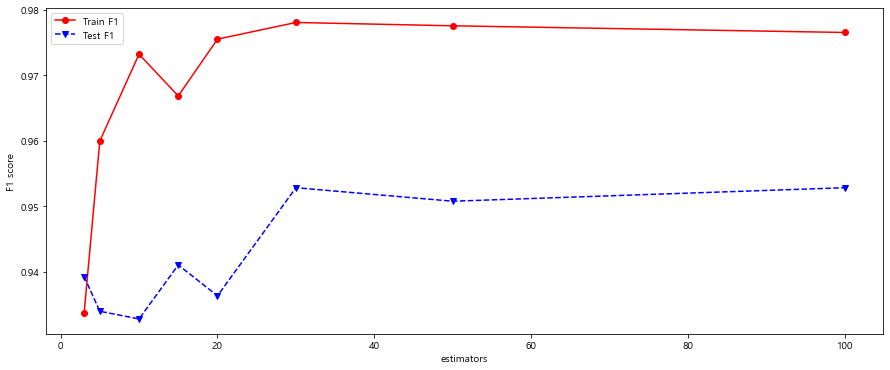

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 163
recall score 실제 충전소가 맞는 지 맞춘 경우 : 135 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47092 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 28 / 47120


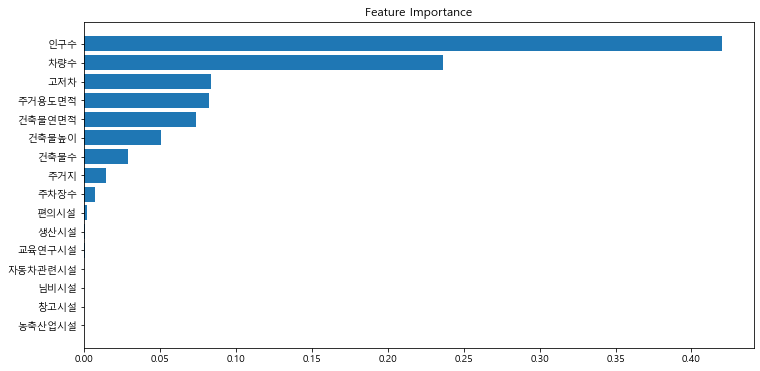

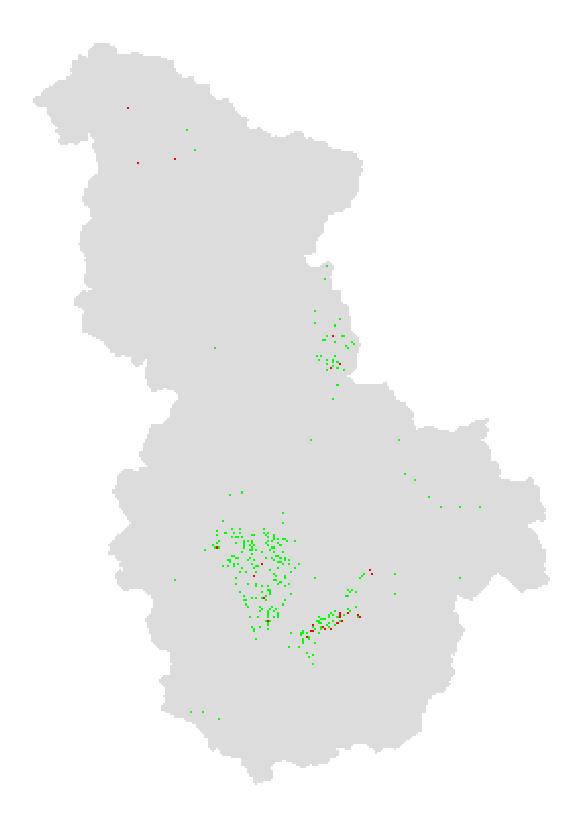

In [65]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

threshold = 0.7
clf, rus_df = Classifier('RandomForest', dists, train_data_rus, train_target_rus, test_data, test_target, threshold)

### RandomForest _ RandomOverSampling


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 30 max_depth= 20 max_features= 16
best_score (test F1 score): 0.9519315836036567



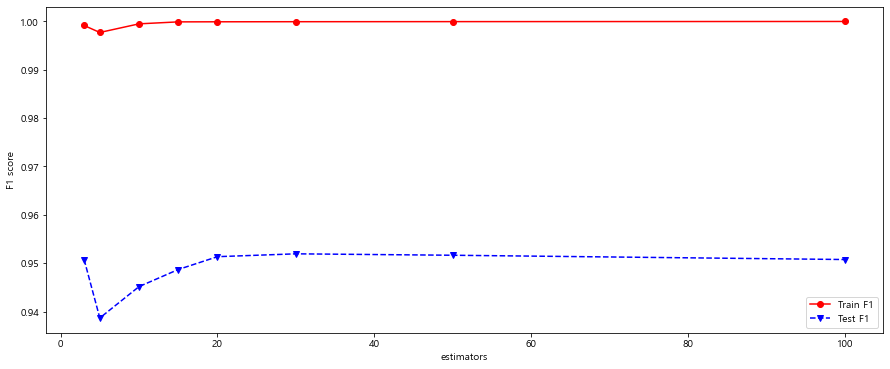

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 151
recall score 실제 충전소가 맞는 지 맞춘 경우 : 130 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47099 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 21 / 47120


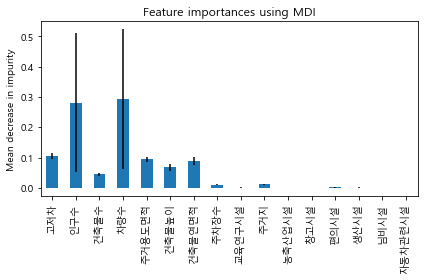

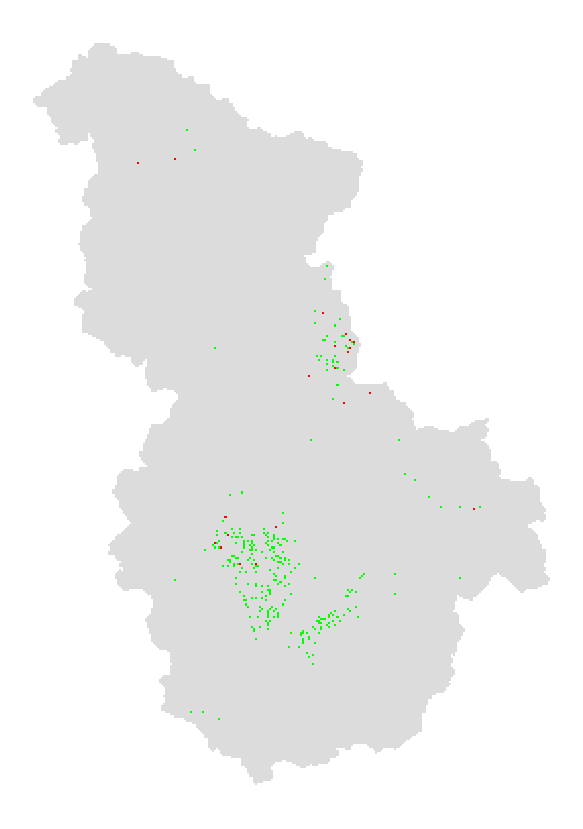

In [126]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

threshold = 0.35
clf, RF_ros_df = Classifier(dists, train_data_ros, train_target_ros, test_data, test_target, threshold)

### RandomForest _ Smote


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 3 max_depth= 200 learning_rate= 16
best_score (test F1 score): 0.9215570628133294



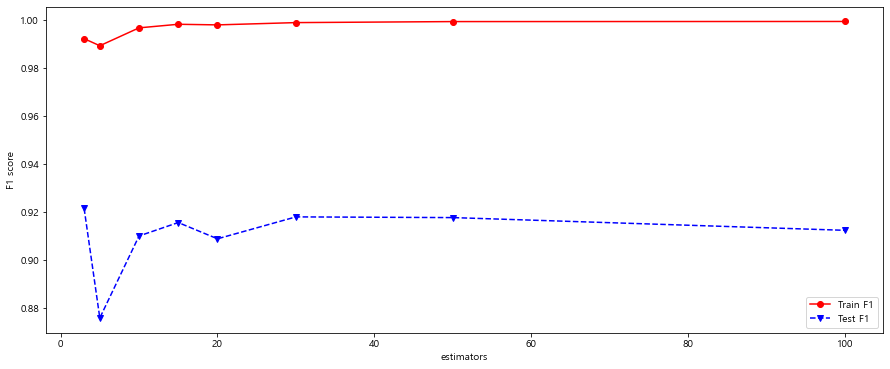

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 510
recall score 실제 충전소가 맞는 지 맞춘 경우 : 163 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 46773 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 347 / 47120


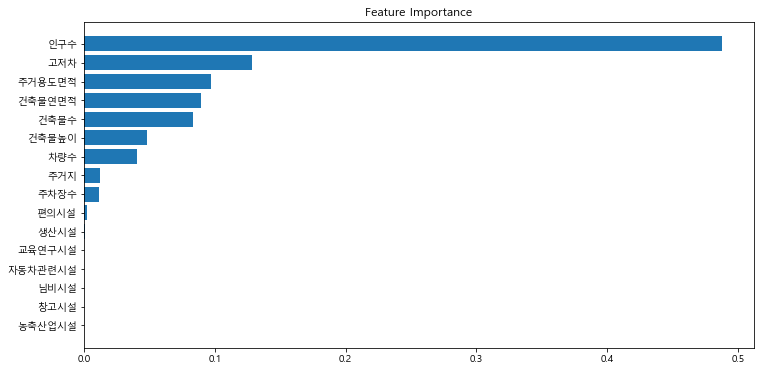

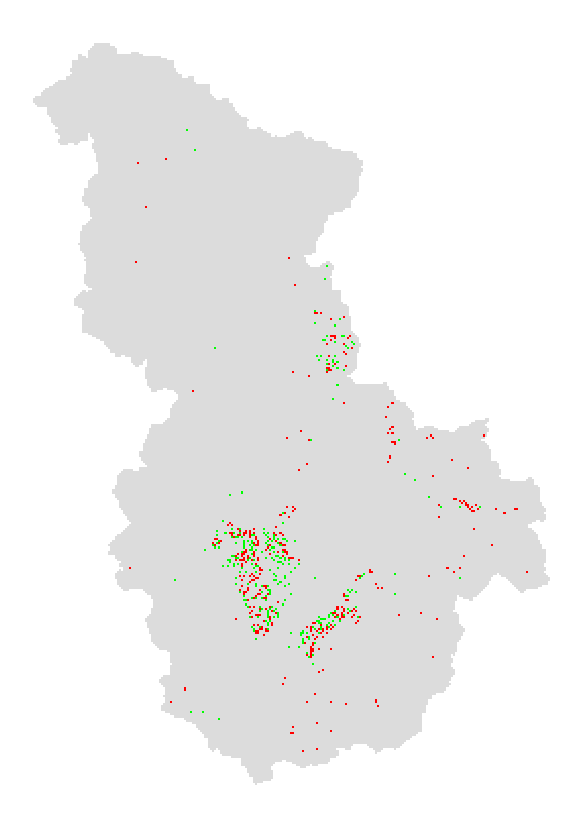

In [73]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

threshold = 0.35
clf, RF_ros_df = Classifier('RandomForest', dists, train_data_smote, train_target_smote, test_data, test_target, threshold)

### XGBoost _ RandomUnderSampling


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 3 max_depth= 50 learning_rate= 0.05
best_score (test F1 score): 0.952226481863757



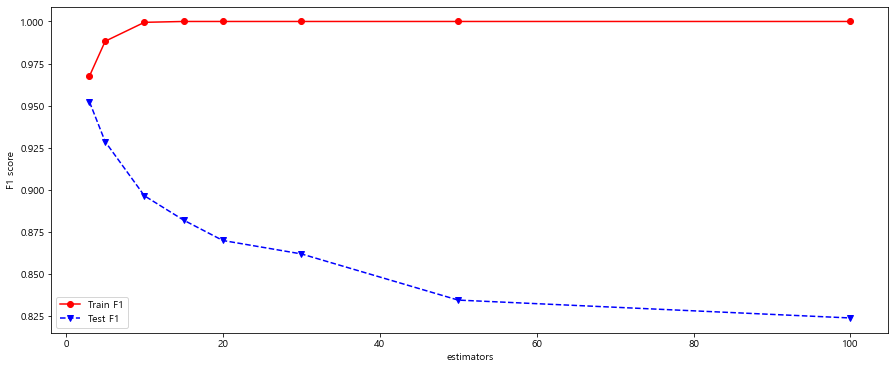

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 146
recall score 실제 충전소가 맞는 지 맞춘 경우 : 130 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47104 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 16 / 47120


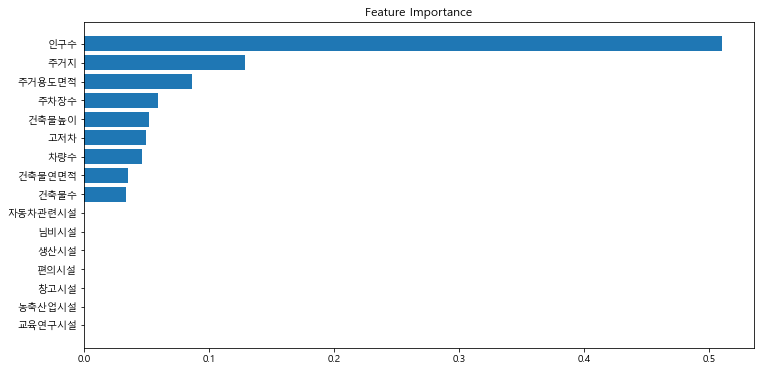

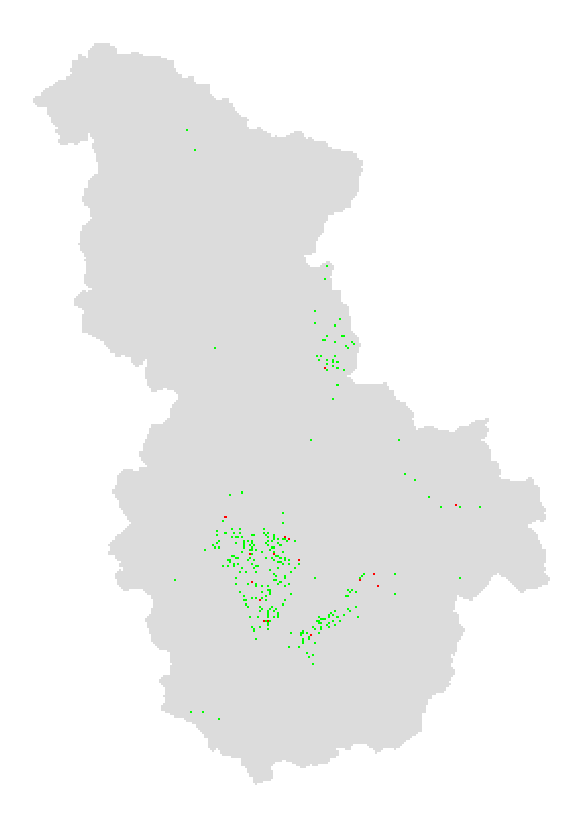

In [66]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'learning_rate' : [0.05, 0.75, 0.1, 0.15, 0.2],
    'n_estimators' : [50,100,200]
}
threshold = 0.55
clf, xgb_rus_df = Classifier('XGBoost', dists, train_data_rus, train_target_rus, test_data, test_target, threshold)

### LightGBM _ RandomUnderSampling


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 3 max_depth= 50 learning_rate= 0.1
best_score (test F1 score): 0.9563550575051607



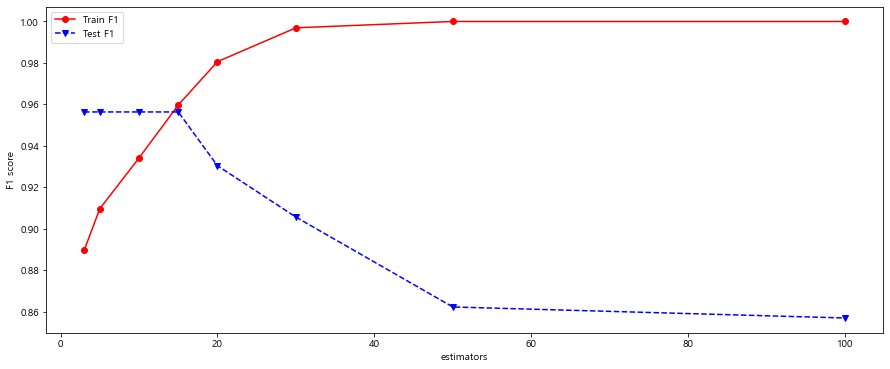

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 128
recall score 실제 충전소가 맞는 지 맞춘 경우 : 128 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47120 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 0 / 47120


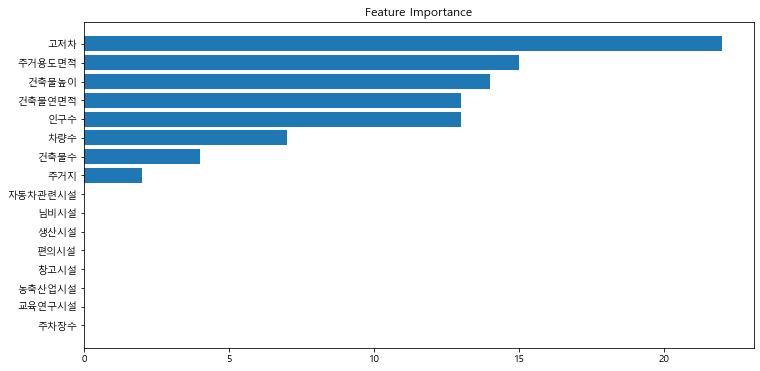

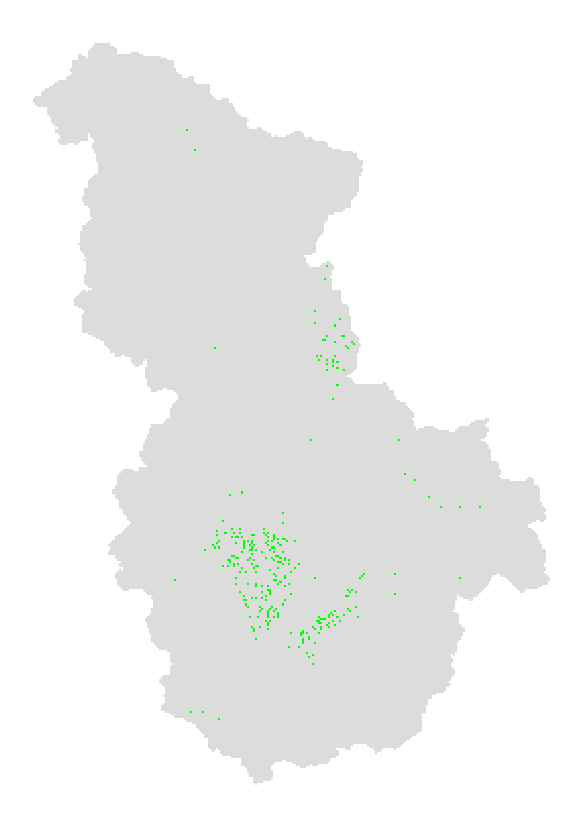

In [67]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'learning_rate' : [0.05, 0.75, 0.1, 0.15, 0.2], 
    'n_estimators' : [50,100,200]
}
threshold = 0.6
clf, lgbm_rus_df = Classifier('LightGBM', dists, train_data_rus, train_target_rus, test_data, test_target, threshold)

### CatBoost _ RandomUnderSampler

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 672
recall score 실제 충전소가 맞는 지 맞춘 경우 : 196 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 46644 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 476 / 47120


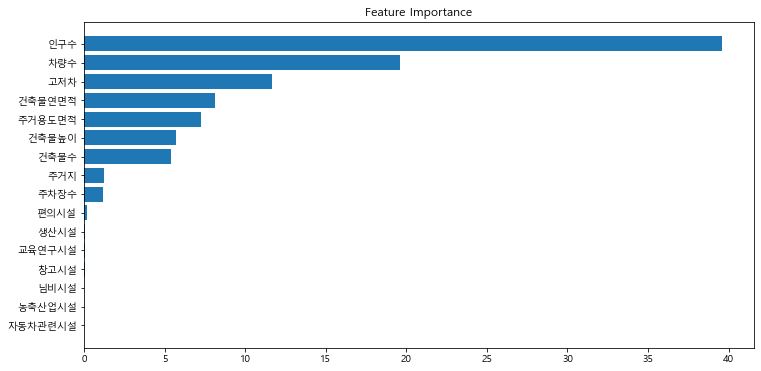

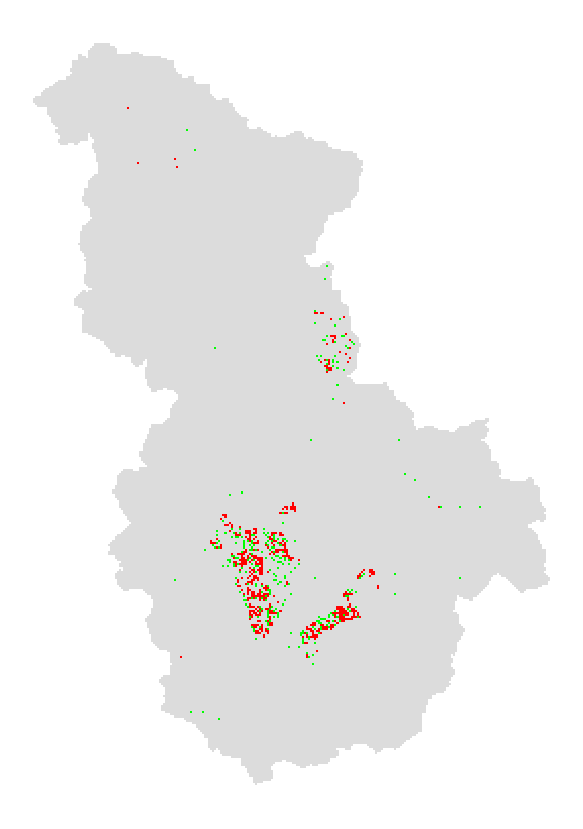

In [69]:
dists = {
    'max_depth' : [5,6,8,10,12,14],
    'learning_rate' : [0.05, 0.75, 0.1, 0.15, 0.2], 
    'n_estimators' : [50,100,200]
}
threshold = 0.6

clf, df = Classifier('CatBoost', dists, train_data_rus, train_target_rus, test_data, test_target, threshold)

In [9]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=(36.57026017312205, 127.26846706447992), zoom_start=11)
    
heatMap = HeatMap(zip(sejong['lat'], sejong['lng'], sejong['인구수']),
                min_opacity=0.05,
                max_val=5,
                radius=5, blur=3,
                max_zoom=10,color='red')

m.add_child(heatMap)
m.save('heatmap_세종_인구수.html')

In [2]:
geo = geopandas.read_file('./dataset/전처리전/전국_읍면동_경계.geojson', encoding='utf-8')
geo = geo[geo['sidonm'] == '세종특별자치시']
geo['color'] = [0]*22

In [29]:
from folium import Marker
from folium.plugins import MarkerCluster


# Draw a basemap
m = folium.Map(location=(36.57026017312205, 127.26846706447992), tiles='cartodbpositron', zoom_start=11)

folium.GeoJson(geo, name = 'json_data').add_to(m)

# Add  points to the map
mc = MarkerCluster()
for i in lgbm_rus_df[lgbm_rus_df['pred']==1].index:
    mc.add_child(    
        Marker(location = [lgbm_rus_df.loc[i]['lat'], lgbm_rus_df.loc[i]['lng']])
    )
    
m.add_child(mc)

# Display the map
m
m.save('heatmap_lgbm.html')

In [25]:
rus_df[rus_df['pred']==1]

,geometry,lat,lng,고저차,인구수,건축물수,차량수,주거용도면적,건축물높이,건축물연면적,...,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV,pred
128,"POLYGON ((977400.00000 1833100.00000, 977400.0...",36.496145,127.246847,24.821,115,4,361.441908,0.0,29.52,4877.28,...,0,0,0,0,0,0,0,0,0,1
765,"POLYGON ((979700.00000 1834200.00000, 979700.0...",36.506027,127.272348,24.869,145,2,160.972174,0.0,25.64,4862.71,...,0,0,0,0,0,0,0,0,0,1
973,"POLYGON ((979000.00000 1835300.00000, 979000.0...",36.515909,127.264587,24.847,155,4,172.073703,0.0,24.55,4187.95,...,0,0,0,0,0,0,0,0,0,1
1098,"POLYGON ((987400.00000 1836900.00000, 987400.0...",36.530283,127.357720,25.056,190,2,253.522529,0.0,34.10,4638.27,...,0,0,0,0,0,0,0,0,0,1
1167,"POLYGON ((976100.00000 1836300.00000, 976100.0...",36.524893,127.232433,24.772,190,2,444.971668,0.0,29.65,4862.90,...,0,0,0,0,0,0,0,0,0,1
1210,"POLYGON ((978000.00000 1831200.00000, 978000.0...",36.479076,127.253499,24.850,84,1,165.695567,0.0,23.46,4719.84,...,0,0,0,0,0,0,0,0,0,1
1241,"POLYGON ((983400.00000 1833500.00000, 983400.0...",36.499739,127.313371,24.966,112,1,82.699374,0.0,34.85,4657.99,...,0,0,0,0,0,0,0,0,0,1
1868,"POLYGON ((979200.00000 1835200.00000, 979200.0...",36.515011,127.266804,24.853,137,2,152.090950,0.0,38.00,4393.05,...,0,0,0,0,0,0,0,0,0,1
3865,"POLYGON ((977800.00000 1832200.00000, 977800.0...",36.488060,127.251282,24.838,109,1,196.666096,0.0,29.75,4883.33,...,0,0,0,0,0,0,0,0,0,1
4308,"POLYGON ((978500.00000 1834500.00000, 978500.0...",36.508722,127.259043,24.838,93,2,103.244222,0.0,38.10,4741.03,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
auroc, clustering